## Analyze Dataset

In [1]:
import pandas as pd
import matplotlib

1292953
schema
0xb77b597c6b8404139df340a738e9252ff7e758564562d34694ebfd8270270865    468195
0xd7b8c4ffa4c9fd1ecb3f6db8201e916a8d7dba11f161c1b0b5ccf44ceb8e2a39     82511
0x6ab5d34260fca0cfcf0e76e96d439cace6aa7c3c019d7c4580ed52c6845e9c89     82511
0x5560b68760b2ec5a727e6a66e1f9754c307384fe7624ae4e0138c530db14a70b     68119
0x3eed14a2055f68d13ad270640208640413b951e12b382b253a08518dedc5172a     53173
0x401a80196f3805c57b00482ae2b575a9f270562b6b6de7711af9837f08fa0faf     51450
0xd0bf4433a27516a2294060cc37ebaf370e09a2293530b824c406f072a9dd72b6     44521
0xba837f9d5f2fe6bc40ffe1f4568af2e516eeebffcf276a04dbe36306780e4f4f     34686
0x24620f482734b3806102678e4b8bb68baafb1adc1ec29e524bcd69c85f15b915     32669
0x8ae6ee946bf1c936584cacc969bf7e9d0b274631c818df7e45c246051b364341     32669
Name: count, dtype: int64


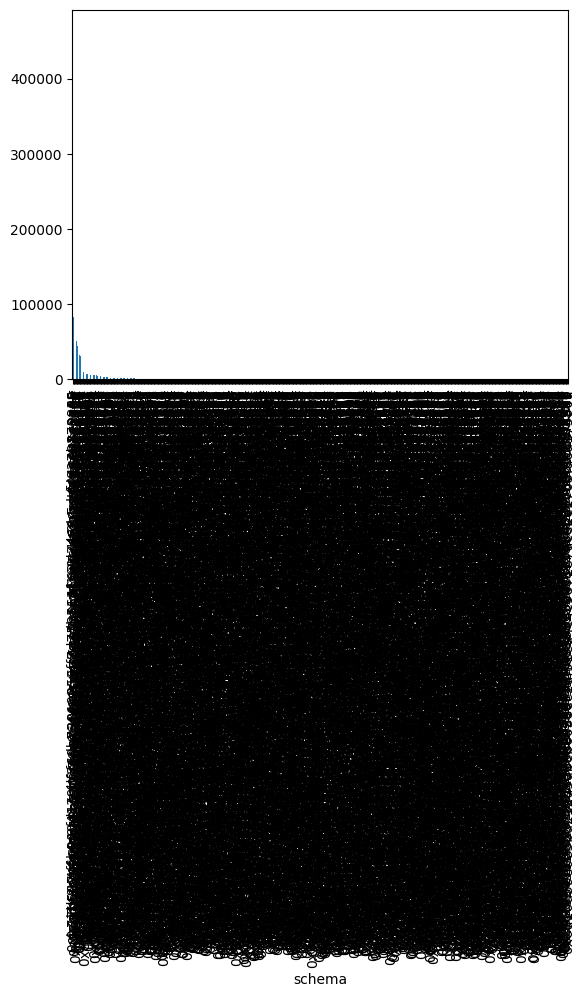

In [ ]:
# Read the enriched attestation events
df = pd.read_json("./eas_attestations/enriched_attestation_events.jsonl",lines=True)
print(f'Number of enriched attestation events: {len(df)}')
#df['schema'].value_counts().plot(kind='bar')

# Log top 10 schemas
print(df['schema'].value_counts().head(10))

Number of filtered attestation events: 3678
schema
0x16bfe4783b7a9c743c401222c56a07ecb77ed42afc84b61ff1f62f5936c0b9d7    1017
0xea02ab33f9f4c92ba02c9bb21614b7410b98c940a0d8eb8ad3a20204d8b4bda5     387
0xb77b597c6b8404139df340a738e9252ff7e758564562d34694ebfd8270270865     304
0x5f430aec9d04f0dcb3729775c5dfe10752e436469a7607f8c64ae44ef996e477     276
0xac2a06e955a7e25e6729efe1a6532237e3435b21ccd3dc827ae3c94e624d25b3     256
0x1f3dce6501d8aad23563c0cf4f0c32264aed9311cb050056ebf72774f89ba912     179
0x24620f482734b3806102678e4b8bb68baafb1adc1ec29e524bcd69c85f15b915     109
0x8ae6ee946bf1c936584cacc969bf7e9d0b274631c818df7e45c246051b364341     107
0xd7b8c4ffa4c9fd1ecb3f6db8201e916a8d7dba11f161c1b0b5ccf44ceb8e2a39     104
0x6ab5d34260fca0cfcf0e76e96d439cace6aa7c3c019d7c4580ed52c6845e9c89      98
Name: count, dtype: int64


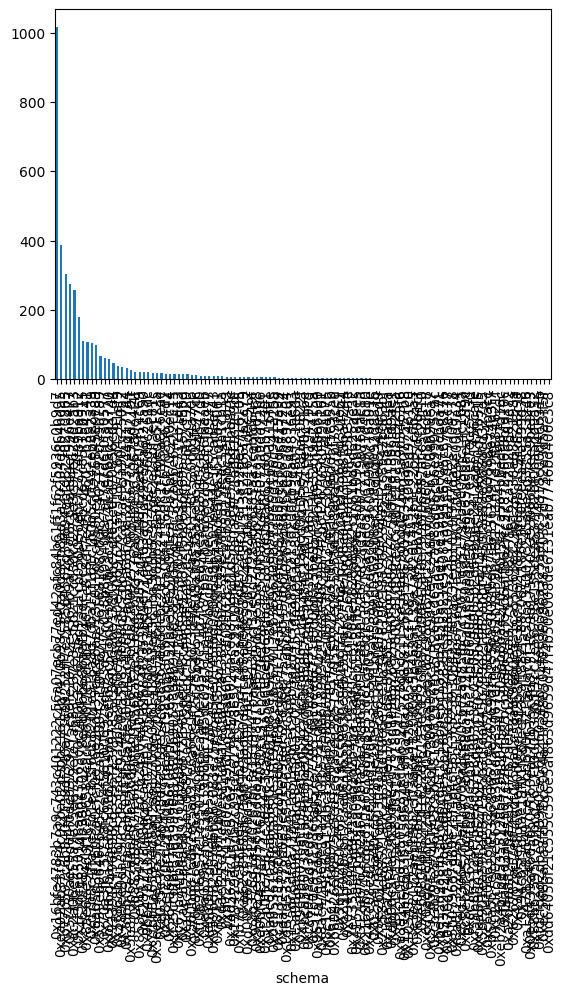

In [4]:
# Read the filtered attestation events
df = pd.read_json("./eas_attestations/filtered_attestation_events.jsonl", lines=True)
print(f'Number of filtered attestation events: {len(df)}')
df['schema'].value_counts().plot(kind='bar')

# Log top 10 schemas
print(df['schema'].value_counts().head(10))

In [5]:
# Read the filtered attestation events
df = pd.read_json("./eas_attestations/filtered_attestation_events.jsonl", lines=True)

# Filter for /github.com\/any_word pattern
# More flexible pattern that handles various repository names
df_filtered = df[df['decoded_data'].apply(lambda x: str(x)).str.contains(r'github\.com\/[^\/\s]+')]

# For each, add a field githubLink with string matching the pattern r'github\.com\/[^\/\s]+'
df_filtered['githubLink'] = df_filtered['decoded_data'].apply(lambda x: str(x)).str.extract(r'github\.com\/([^\/\s]+)')

# Log top 10 githubLink
print(f'Number of attestations containing github url: {len(df_filtered)}')
print(f'Number of unique github links: {len(df_filtered["githubLink"].unique())}')
print(df_filtered['githubLink'].value_counts().head(10))

Number of attestations containing github url: 2500
Number of unique github links: 1153
githubLink
orgs                   48
greenpill-dev-guild    33
Panmoni                24
AtlantisDAO1           23
Panmoni',              22
peeramid-labs          20
svanas                 16
MesoReefDAO            15
Super-DCA-Tech         15
lil-org                14
Name: count, dtype: int64


/var/folders/hd/mwwk_4zs7blcj6tc0ycm9t5c0000gn/T/ipykernel_10672/629551922.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['githubLink'] = df_filtered['decoded_data'].apply(lambda x: str(x)).str.extract(r'github\.com\/([^\/\s]+)')


In [6]:
# Read the filtered attestation events
df = pd.read_json("./eas_attestations/filtered_attestation_events.jsonl", lines=True)

# Filter for /github.com\/any_word pattern
# More flexible pattern that handles various repository names
df_filtered = df[df['decoded_data'].apply(lambda x: str(x)).str.contains(r'github\.com\/orgs\/[^\/\s]+')]

# For each, add a field githubLink with string matching the pattern r'github\.com\/[^\/\s]+'
df_filtered['githubLink'] = df_filtered['decoded_data'].apply(lambda x: str(x)).str.extract(r'github\.com\/orgs\/([^\/\s]+)')

# Log top 10 githubLink
print(f'Number of attestations containing github url: {len(df_filtered)}')
print(f'Number of unique github links: {len(df_filtered["githubLink"].unique())}')
print(df_filtered['githubLink'].value_counts().head(10))

Number of attestations containing github url: 59
Number of unique github links: 30
githubLink
greenpill-dev-guild         8
Kingfishers-Media-LLC',     5
fractaldotbox               4
deScier                     3
Kingfishers-Media-LLC'},    3
Eppie-io                    3
Hydrafront                  2
builders-garden             2
AERTHCODE                   2
Treegens                    2
Name: count, dtype: int64


/var/folders/hd/mwwk_4zs7blcj6tc0ycm9t5c0000gn/T/ipykernel_10672/619376035.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['githubLink'] = df_filtered['decoded_data'].apply(lambda x: str(x)).str.extract(r'github\.com\/orgs\/([^\/\s]+)')
